In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [3]:
df = pd.read_csv(r"E:\DS Training\Data\spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size = 0.2)

In [6]:
x_train.shape

(4457,)

In [8]:
x_test.shape

(1115,)

In [9]:
stopW = stopwords.words('english')
df['test_without_sw'] = df['Message'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopW]))
df

,Category,Message,spam,test_without_sw
0,ham,"Go until jurong point, crazy.. Available only ...",0,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,0,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,U dun say early hor... U c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I think goes usf, lives around though"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,This 2nd time tried 2 contact u. U £750 Pound ...
5568,ham,Will ü b going to esplanade fr home?,0,Will ü b going esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"Pity, * mood that. So...any suggestions?"
5570,ham,The guy did some bitching but I acted like i'd...,0,The guy bitching I acted like i'd interested b...


In [13]:
'the' in stopW

True

In [14]:
df_spam = df[df['spam']==1]
df_ham = df[df['spam']==0]

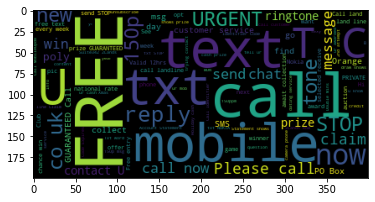

In [20]:
text = ' '.join(df_spam['test_without_sw'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

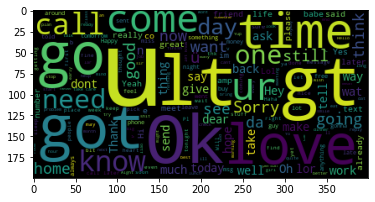

In [21]:
text = ' '.join(df_ham['test_without_sw'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [22]:
cv = CountVectorizer()
x_train_num = cv.fit_transform(x_train.values)

In [23]:
x_train_num.shape

(4457, 7714)

In [24]:
x_train.shape

(4457,)

In [25]:
x_train_num.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
model = MultinomialNB()
model.fit(x_train_num, y_train)

MultinomialNB()

In [28]:
x_test_num = cv.transform(x_test)

In [29]:
model.score(x_test_num, y_test)

0.9847533632286996

In [30]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

In [31]:
email_num = cv.transform(emails)

In [32]:
model.predict(email_num)

array([0, 1], dtype=int64)